In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils.multiclass import unique_labels
import os
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras_preprocessing.image import ImageDataGenerator, img_to_array, load_img
import seaborn as sns
from keras import applications
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
from keras.applications import VGG19 #For Transfer Learning
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from keras.utils import to_categorical
import math
import datetime
import time
import os

img_width, img_height = 224, 224
batch_size = 50

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install split-folders --quiet

In [ ]:
import splitfolders
splitfolders.ratio("/content/drive/MyDrive/Project/Danger Of Extinction",output='Splitted',ratio=(0.8,0.1,0.1))

Copying files: 6700 files [02:07, 52.62 files/s]


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
import keras.layers as ml

from PIL import Image

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator as Imgen

In [ ]:
train_dir = "./Splitted/train"
val_dir = "./Splitted/val"
test_dir = "./Splitted/test"

In [ ]:
train_ds = Imgen(rescale=1./255).flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    seed = 1,
                                                     batch_size=32
                                                    )
val_ds = Imgen(rescale=1./255).flow_from_directory(val_dir,
                                                    target_size=(150,150),
                                                    seed = 1,
                                                     batch_size=32
                                                    )
test_ds = Imgen(rescale=1./255).flow_from_directory(test_dir,
                                                    target_size=(150,150),
                                                    seed = 1,
                                                     batch_size=32)

Found 5349 images belonging to 21 classes.
Found 663 images belonging to 21 classes.
Found 681 images belonging to 21 classes.


In [ ]:
datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
generator = datagen.flow_from_directory(
train_dir,
target_size=(img_width, img_height),
batch_size=batch_size,
class_mode=None,
shuffle=False)

Found 5349 images belonging to 21 classes.


In [ ]:
generator = datagen.flow_from_directory(
train_dir,
target_size=(img_width, img_height),
batch_size=batch_size,
class_mode=None,
shuffle=False)

Found 5349 images belonging to 21 classes.


In [ ]:
#training data
generator_top = datagen.flow_from_directory(
         train_dir,
         target_size=(img_width, img_height),
         batch_size=batch_size,
         class_mode='categorical',
         shuffle=False)
nb_train_samples = len(generator_top.filenames)
num_classes = len(generator_top.class_indices)

Found 5349 images belonging to 21 classes.


In [ ]:
def read_image(file_path):
    print("[INFO] loading and preprocessing image...")
    image = load_img(file_path, target_size=(224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image /= 255.
    return image

In [ ]:
def test_single_image(path):
    animals = ['African Golden Cat',
 'African_Elephant',
 'Amur_Leopard',
 'Arctic_Fox',
 'Black Footed Cat',
 'Cavalier King Charles Spaniel',
 'Chimpanzee',
 'Chinese Mountain Cat',
 'Irish Water Spaniel',
 'Jaguars',
 'Lion',
 'Marbled Cat',
 'Orangutan',
 'Otterhound',
 'Pampas Cat',
 'Panda',
 'Panthers',
 'Rhino',
 'Scottish Deerhound',
 'Sussex Spaniel',
 'cheetahs']
    images = read_image(path)
    time.sleep(.5)

    bt_prediction = vgg16.predict(images)
    preds = model.predict(bt_prediction)

    for idx, animal, x in zip(range(0,6), animals , preds[0]):
        print("ID: {}, Label: {} {}%".format(idx, animal, round(x*100,2) ))
    print('Final Decision:')
    time.sleep(.5)
    for x in range(3):
        print('.'*(x+1))
        time.sleep(.2)
    class_predicted = model.predict(bt_prediction)
    class_dictionary = generator_top.class_indices
    inv_map = {v: k for k, v in class_dictionary.items()}
    print("ID: {}, Label: {}".format(class_predicted[0], inv_map[np.argmax(class_predicted[0])]))
    return load_img(path)

In [ ]:
x_train,y_train = next(train_ds)
labels = train_ds.class_indices
labels

{'African Golden Cat': 0,
 'African_Elephant': 1,
 'Amur_Leopard': 2,
 'Arctic_Fox': 3,
 'Black Footed Cat': 4,
 'Cavalier King Charles Spaniel': 5,
 'Chimpanzee': 6,
 'Chinese Mountain Cat': 7,
 'Irish Water Spaniel': 8,
 'Jaguars': 9,
 'Lion': 10,
 'Marbled Cat': 11,
 'Orangutan': 12,
 'Otterhound': 13,
 'Pampas Cat': 14,
 'Panda': 15,
 'Panthers': 16,
 'Rhino': 17,
 'Scottish Deerhound': 18,
 'Sussex Spaniel': 19,
 'cheetahs': 20}

In [ ]:
pred_li = list(labels.keys())
pred_li

['African Golden Cat',
 'African_Elephant',
 'Amur_Leopard',
 'Arctic_Fox',
 'Black Footed Cat',
 'Cavalier King Charles Spaniel',
 'Chimpanzee',
 'Chinese Mountain Cat',
 'Irish Water Spaniel',
 'Jaguars',
 'Lion',
 'Marbled Cat',
 'Orangutan',
 'Otterhound',
 'Pampas Cat',
 'Panda',
 'Panthers',
 'Rhino',
 'Scottish Deerhound',
 'Sussex Spaniel',
 'cheetahs']

In [ ]:
un_labels = train_ds.classes
len(un_labels)

5349

In [ ]:
un_animals = pd.DataFrame(un_labels).value_counts()
un_animals

15    676
10    644
17    618
20    472
9     461
16    452
2     424
12    396
1     376
6     369
3     295
14     18
19     18
18     18
4      16
13     16
5      16
11     16
8      16
7      16
0      16
dtype: int64

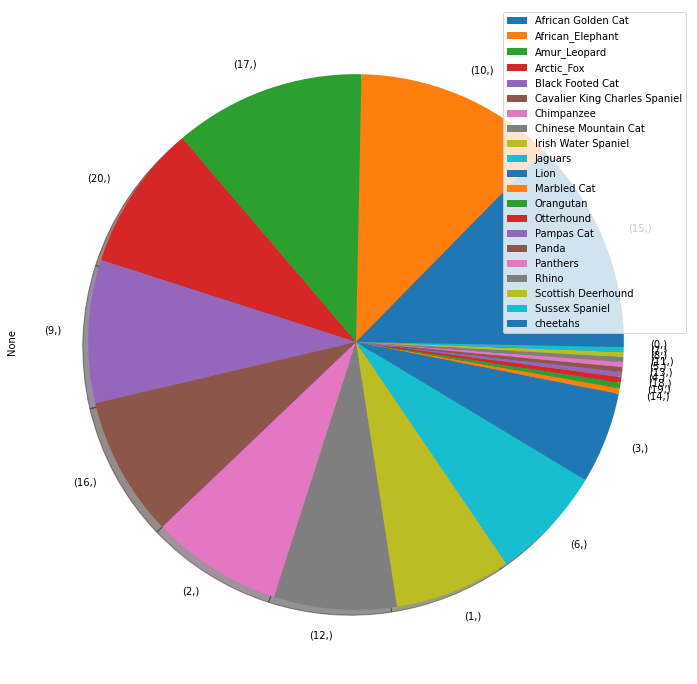

In [ ]:
plt.figure(figsize=(12,15))
un_animals.plot(kind='pie',shadow=True)
plt.legend(pred_li,loc ='upper right');

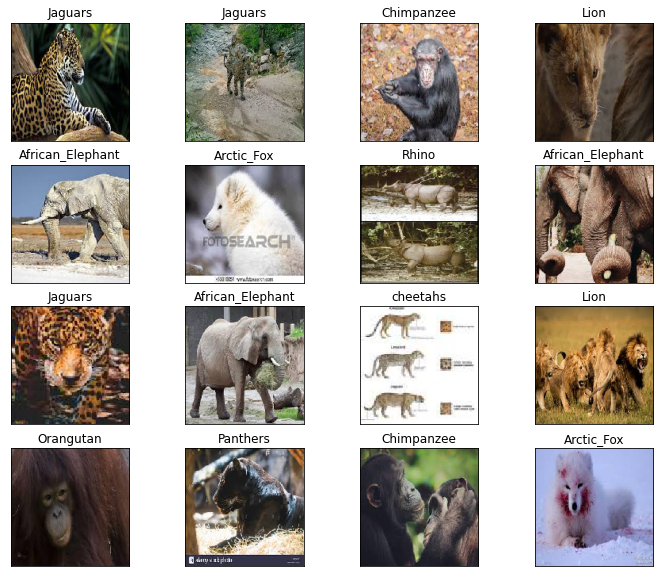

In [ ]:
plt.figure(figsize=(12,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.title(pred_li[np.argmax(y_train[i])])

<h1>ResNet50

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
base_model = ResNet50(include_top=False,
                       weights='imagenet',
                       input_shape=(150,150,3)
                       )
base_model.trainable = False

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
model = keras.models.Sequential([

    #base_model
    base_model,

    ml.GlobalAveragePooling2D(),

    ml.Dense(128,activation='relu'),
    ml.Dropout(0.5),

    ml.Dense(64,activation='relu'),
    ml.Dropout(0.5),

    ml.Dense(21,activation='relu')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                        

In [ ]:
#compile
model.compile(optimizer='adam',loss=keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
#callbacks
my_calls = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3),tf.keras.callbacks.ModelCheckpoint(monitor='val_accuracy',save_best_only=True,mode='max',filepath="./")]

In [ ]:
#train
hist = model.fit(train_ds,epochs=10,validation_data=val_ds,callbacks=my_calls)

Epoch 1/10
168/168 [==============================] - ETA: 0s - loss: 2.8548 - accuracy: 0.1120

168/168 [==============================] - 68s 328ms/step - loss: 2.8548 - accuracy: 0.1120 - val_loss: 2.6339 - val_accuracy: 0.1373
Epoch 2/10
168/168 [==============================] - ETA: 0s - loss: 2.6593 - accuracy: 0.1297

168/168 [==============================] - 53s 314ms/step - loss: 2.6593 - accuracy: 0.1297 - val_loss: 2.5159 - val_accuracy: 0.1418
Epoch 3/10
168/168 [==============================] - ETA: 0s - loss: 2.5839 - accuracy: 0.1438

168/168 [==============================] - 50s 299ms/step - loss: 2.5839 - accuracy: 0.1438 - val_loss: 2.4545 - val_accuracy: 0.1976
Epoch 4/10
168/168 [==============================] - 29s 174ms/step - loss: 2.5466 - accuracy: 0.1527 - val_loss: 2.4251 - val_accuracy: 0.1961
Epoch 5/10
168/168 [==============================] - ETA: 0s - loss: 2.5049 - accuracy: 0.1709

168/168 [==============================] - 50s 298ms/step - loss: 2.5049 - accuracy: 0.1709 - val_loss: 2.4009 - val_accuracy: 0.2081
Epoch 6/10
168/168 [==============================] - 29s 175ms/step - loss: 2.4727 - accuracy: 0.1828 - val_loss: 2.3999 - val_accuracy: 0.2021
Epoch 7/10
168/168 [==============================] - 29s 174ms/step - loss: 2.4532 - accuracy: 0.1868 - val_loss: 2.4145 - val_accuracy: 0.1931
Epoch 8/10
168/168 [==============================] - ETA: 0s - loss: 2.4541 - accuracy: 0.1853

In [ ]:
#test
model.evaluate(test_ds)

In [ ]:
plt.figure(figsize=(6,6))

plt.plot(hist.epoch,hist.history['accuracy'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_accuracy'],label = 'validation')

plt.title("Accuracy")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(6,6))

plt.plot(hist.epoch,hist.history['loss'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_loss'],label = 'validation')

plt.title("Loss")
plt.legend()
plt.show()

In [ ]:
x_test,y_test = next(test_ds)
print(x_test.shape,y_test.shape)

In [ ]:
pred_test = model.predict(x_test)
pred_test = [np.argmax(i) for i in pred_test]

1/1 [==============================] - 1s 911ms/step


In [ ]:
pred_li

['African Golden Cat',
 'African_Elephant',
 'Amur_Leopard',
 'Arctic_Fox',
 'Black Footed Cat',
 'Cavalier King Charles Spaniel',
 'Chimpanzee',
 'Chinese Mountain Cat',
 'Irish Water Spaniel',
 'Jaguars',
 'Lion',
 'Marbled Cat',
 'Orangutan',
 'Otterhound',
 'Pampas Cat',
 'Panda',
 'Panthers',
 'Rhino',
 'Scottish Deerhound',
 'Sussex Spaniel',
 'cheetahs']

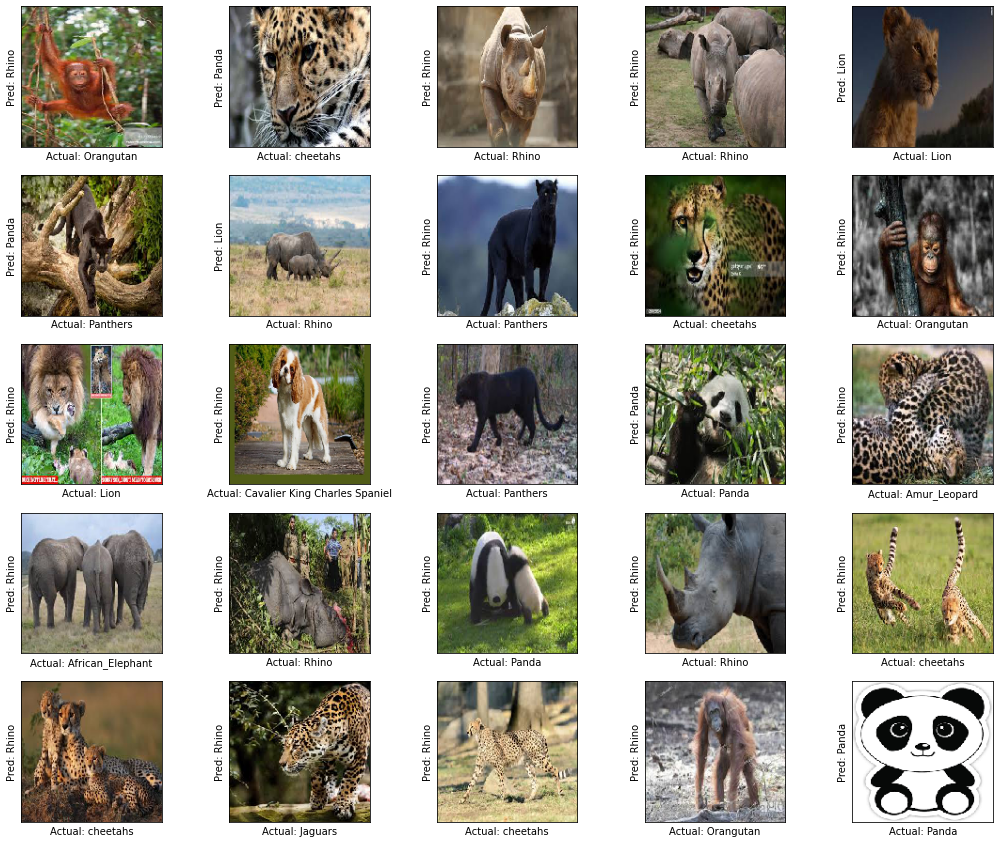

In [ ]:
plt.figure(figsize=(18,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i])
    plt.xlabel("Actual: {}".format(pred_li[np.argmax(y_test[i])]))
    plt.ylabel("Pred: {}".format(pred_li[pred_test[i]]))

In [ ]:
Model_Results = model.evaluate(test_ds)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.4f" % Model_Results[1])